In [ ]:
from quant_rotor.core.dense.hamiltonian_big import hamiltonian_general
from quant_rotor.core.dense.hamiltonian import hamiltonian
from quant_rotor.core.dense.de_solve_one_thermal import integration_scheme
from quant_rotor.core.dense.t_amplitudes_periodic import t_periodic
import numpy as np
import matplotlib.pyplot as plt
from quant_rotor.models.dense.density_matrix import density_matrix_1, density_matrix_2
from quant_rotor.models.dense.support_ham import write_matrix_elements, basis_m_to_p_matrix_conversion, H_kinetic, H_potential, H_kinetic_sparse, H_potential_sparse, H_potential_general

# TF-CCC

In [2]:
site = 3
state = 3
g = 0.1

In [3]:
H_K_V = hamiltonian_general(state, site, g)

H = H_K_V[0]
K = H_K_V[1]
V = H_K_V[2]

K_tilda = K_tilde_maker(K)
# V_tilda = K_tilde_maker(V)
V_tilda = K_tilde_maker(V)

(3, 3)
(9, 9)


/Users/gilfrim/Desktop/Projects/Computational_Analisis_of_Many_Rotor_Systems/quant_rotor/models/thermofield_boltz_funcs.py:68: ComplexWarning: Casting complex values to real discards the imaginary part
  H_Tilde_2[i,k + physical_hilbert_dim*j] = diagonal_basis[j,i]*hamiltonian[j,k]
/Users/gilfrim/Desktop/Projects/Computational_Analisis_of_Many_Rotor_Systems/quant_rotor/models/thermofield_boltz_funcs.py:89: ComplexWarning: Casting complex values to real discards the imaginary part
  H_tilde[:physical_hilbert_dim,:physical_hilbert_dim] = H_Tilde_1
/Users/gilfrim/Desktop/Projects/Computational_Analisis_of_Many_Rotor_Systems/quant_rotor/models/thermofield_boltz_funcs.py:92: ComplexWarning: Casting complex values to real discards the imaginary part
  H_tilde[physical_hilbert_dim:,physical_hilbert_dim:] = H_tilde_4


In [4]:
K_final = H_kinetic(state**2, site, K_tilda)
V_final = H_potential(state**2, site, V_tilda, g)

In [5]:
h_tilda = K_final + V_final

In [6]:
h_tilda.shape

(729, 729)

In [7]:
eng_tilda, _ = np.linalg.eigh(h_tilda)

In [8]:
np.min(eng_tilda)

np.float64(-0.26351438405344557)

In [9]:
eig, _ = np.linalg.eigh(H)

In [10]:
beta, t_0_dB, _, _  = integration_scheme(site, state, g, t_init=0,t_final=10,nof_points=100000, import_K_V_NO=True, K_import=K, V_import=V)
beta2, t_0_dB2, _, _  = integration_scheme(site, state, g, t_init=0,t_final=10,nof_points=100000, import_K_V_TF=True, K_import=K_tilda, V_import=V_tilda)

In [11]:
_, _, energy, _, _ = t_periodic(site, state, g)

In [12]:
print("ED Groudn State:", np.min(eig))
print("Standard CC:", energy)
print("Imag Time Propogation:", np.max(t_0_dB))
print("TF-CCC:", np.max(t_0_dB2)*3)

ED Groudn State: -0.020053006072839073
Standard CC: (-0.02023809507128907+0j)
Imag Time Propogation: (0.020271569236515255-0j)
TF-CCC: (0.0007775013094384298+0j)


/Users/gilfrim/Desktop/Projects/Computational_Analisis_of_Many_Rotor_Systems/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/gilfrim/Desktop/Projects/Computational_Analisis_of_Many_Rotor_Systems/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


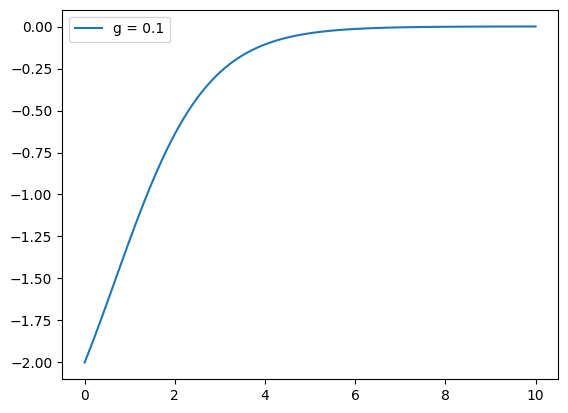

In [13]:
plt.plot(beta2, t_0_dB2, label=f"g = {g}")
plt.legend()
plt.show()

# Density.

In [2]:
sites = 3
states = 5
g = 0.2

In [70]:
H = hamiltonian(states, sites, g)[0]
eig_val, eig_vec = np.linalg.eigh(H)

In [71]:
ground_state = eig_vec[:, np.argmin(eig_val)]

In [86]:
x = 1
        
D_x = density_matrix_1(states, sites, ground_state, 0)
D_xy = density_matrix_2(states, sites, ground_state, 0, x)

D_xy = D_xy.reshape(states**2, states**2)

C_xy = D_xy - np.kron(D_x, D_x)

In [76]:
np.allclose(np.abs(C_xy2), np.abs(C_xy), atol=1e-8, rtol=1e-5)

False

In [77]:
C_xy = C_xy.reshape(states, states, states, states)

In [79]:
X_y = np.einsum('pqpr->qr', C_xy)

In [81]:
C_xy = C_xy.reshape(states**2, states**2)

In [87]:
eig_val, eig_vec = np.linalg.eigh(C_xy)

In [88]:
index = np.argsort(eig_val)
eig_val[index[:4]]

array([-0.097978985519, -0.015801975528, -0.004287383704, -0.002547071587])

In [13]:
eigval_pos = np.zeros((4, 10), dtype=complex)
eigval_neg = np.zeros((4, 10), dtype=complex)
g_array = np.zeros((10))

for g_index in range(1, 11):
    g = g_index/10

    H = hamiltonian(states, sites, g)[0]
    eig_val, eig_vec = np.linalg.eigh(H)

    ground_state = eig_vec[:, np.argmin(eig_val)]

    x = 1
        
    D_x = density_matrix_1(states, sites, ground_state, 0)
    D_xy = density_matrix_2(states, sites, ground_state, 0, x)

    D_xy = D_xy.reshape(states**2, states**2)

    C_xy = D_xy - np.kron(D_x, D_x)

    eig_val, eig_vec = np.linalg.eigh(C_xy)

    index = np.argsort(eig_val)
    eigval_pos[0, g_index - 1] = eig_val[index[-1]]
    eigval_pos[1, g_index - 1] = eig_val[index[-2]]
    eigval_pos[2, g_index - 1] = eig_val[index[-3]]
    eigval_pos[3, g_index - 1] = eig_val[index[-4]]

    eigval_neg[0, g_index - 1] = eig_val[index[0]]
    eigval_neg[1, g_index - 1] = eig_val[index[1]]
    eigval_neg[2, g_index - 1] = eig_val[index[2]]
    eigval_neg[3, g_index - 1] = eig_val[index[3]]

    g_array[g_index-1] = g

In [17]:
eigval_pos[2, :]

array([0.000034623919+0.j, 0.000276604985+0.j, 0.000861735627+0.j, 0.001709926667+0.j, 0.002554047511+0.j, 0.003177510137+0.j, 0.003536604207+0.j, 0.003691162297+0.j, 0.003716881811+0.j, 0.003670675806+0.j])

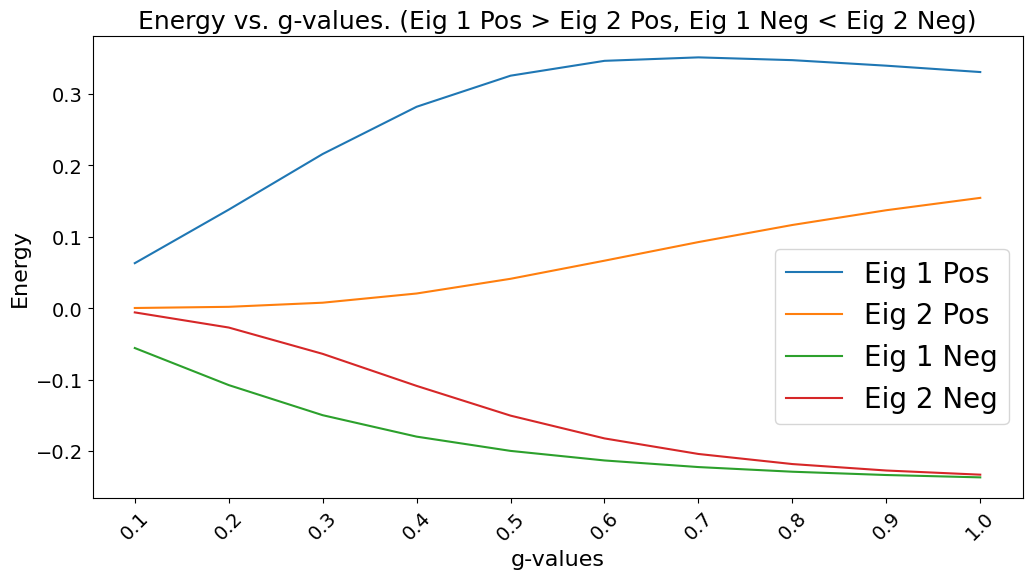

In [34]:
plt.figure(figsize=(12, 6))
plt.rcParams.update({
    'font.size': 14,              # Larger font for all text
    'legend.fontsize': 20,        # Larger legend text
    'axes.labelsize': 16,         # Axis labels
    'xtick.labelsize': 14,        # Tick labels
    'ytick.labelsize': 14
})

plt.plot(g_array, eigval_pos[0, :], label=f"Eig 1 Pos")
plt.plot(g_array, eigval_pos[1, :], label=f"Eig 2 Pos")
plt.plot(g_array, eigval_neg[0, :], label=f"Eig 1 Neg")
plt.plot(g_array, eigval_neg[1, :], label=f"Eig 2 Neg")
plt.xticks(g_array, rotation=45) 
plt.xlabel("g-values")
plt.ylabel("Energy")
plt.title("Energy vs. g-values. (Eig 1 Pos > Eig 2 Pos, Eig 1 Neg < Eig 2 Neg)", fontsize=18)
plt.legend(loc='lower right', bbox_to_anchor=(1, 0.13))
plt.show()

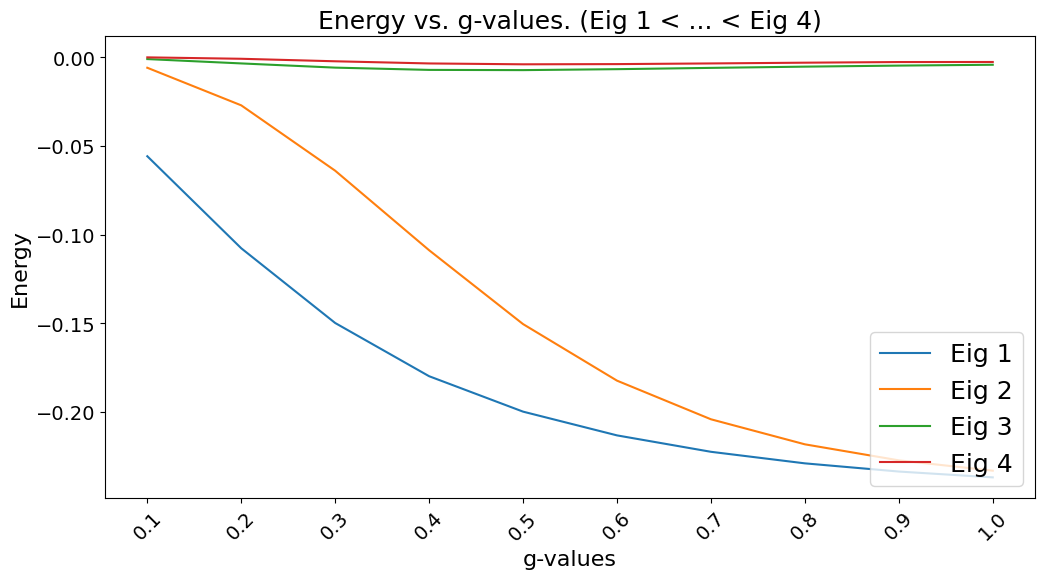

In [21]:
plt.figure(figsize=(12, 6))
plt.rcParams.update({
    'font.size': 14,              # Larger font for all text
    'legend.fontsize': 18,        # Larger legend text
    'axes.labelsize': 16,         # Axis labels
    'xtick.labelsize': 14,        # Tick labels
    'ytick.labelsize': 14
})

plt.plot(g_array, eigval_neg[0, :], label=f"Eig 1")
plt.plot(g_array, eigval_neg[1, :], label=f"Eig 2")
plt.plot(g_array, eigval_neg[2, :], label=f"Eig 3")
plt.plot(g_array, eigval_neg[3, :], label=f"Eig 4")
plt.xticks(g_array, rotation=45) 
plt.xlabel("g-values")
plt.ylabel("Energy")
plt.title("Energy vs. g-values. (Eig 1 < ... < Eig 4)", fontsize=18)
plt.legend(loc='lower right')
plt.show()